# Testing ER YTD to Index Conversion

This notebook tests the conversion of excess return year-to-date data to custom indices.

In [2]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils.data_transformations import convert_er_ytd_to_index
from src.utils.csv_exporter import read_csv_to_df  # Import from correct location
import seaborn as sns

# Set basic plot style
plt.style.use('default')

# Define the absolute path to the data directory
data_path = Path(os.getcwd()).parent / 'data'

# Load the er_ytd data
er_ytd_df = read_csv_to_df(data_path / 'er_ytd_data.csv', fill='ffill', start_date_align='yes')

# Display basic information about the data
print("Original ER YTD Data Info:")
print(er_ytd_df.info())
print("\nFirst few rows:")
print(er_ytd_df.head())

Original ER YTD Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2002-12-31 to 2024-12-06
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cad_ig_oas              5507 non-null   float64
 1   us_ig_oas               5507 non-null   float64
 2   us_hy_oas               5507 non-null   float64
 3   eur_ig_oas              5507 non-null   float64
 4   cad_ig_oas_1-5yr        5507 non-null   float64
 5   cad_ig_oas_5-10yr       5507 non-null   float64
 6   cad_ig_oas_>10yr        5507 non-null   float64
 7   cad_ig_oas_fins         5507 non-null   float64
 8   cad_ig_oas_industrials  5507 non-null   float64
 9   cad_ig_oas_utility      5507 non-null   float64
 10  cad_ig_oas_a            5507 non-null   float64
 11  cad_ig_oas_bbb          5507 non-null   float64
 12  cad_prov_oas            5507 non-null   float64
 13  cad_prov_oas_1-5yr      5507 non-null   float64


In [3]:
# Convert to indices
indices_df = convert_er_ytd_to_index(er_ytd_df)

# Display basic information about the converted data
print("Converted Indices Data Info:")
print(indices_df.info())
print("\nFirst few rows:")
print(indices_df.head())

Converted Indices Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2002-12-31 to 2024-12-06
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cad_ig_oas_index              5507 non-null   float64
 1   us_ig_oas_index               5507 non-null   float64
 2   us_hy_oas_index               5507 non-null   float64
 3   eur_ig_oas_index              5507 non-null   float64
 4   cad_ig_oas_1-5yr_index        5507 non-null   float64
 5   cad_ig_oas_5-10yr_index       5507 non-null   float64
 6   cad_ig_oas_>10yr_index        5507 non-null   float64
 7   cad_ig_oas_fins_index         5507 non-null   float64
 8   cad_ig_oas_industrials_index  5507 non-null   float64
 9   cad_ig_oas_utility_index      5507 non-null   float64
 10  cad_ig_oas_a_index            5507 non-null   float64
 11  cad_ig_oas_bbb_index          5507 non-null   float64
 12  cad_prov_oas_in

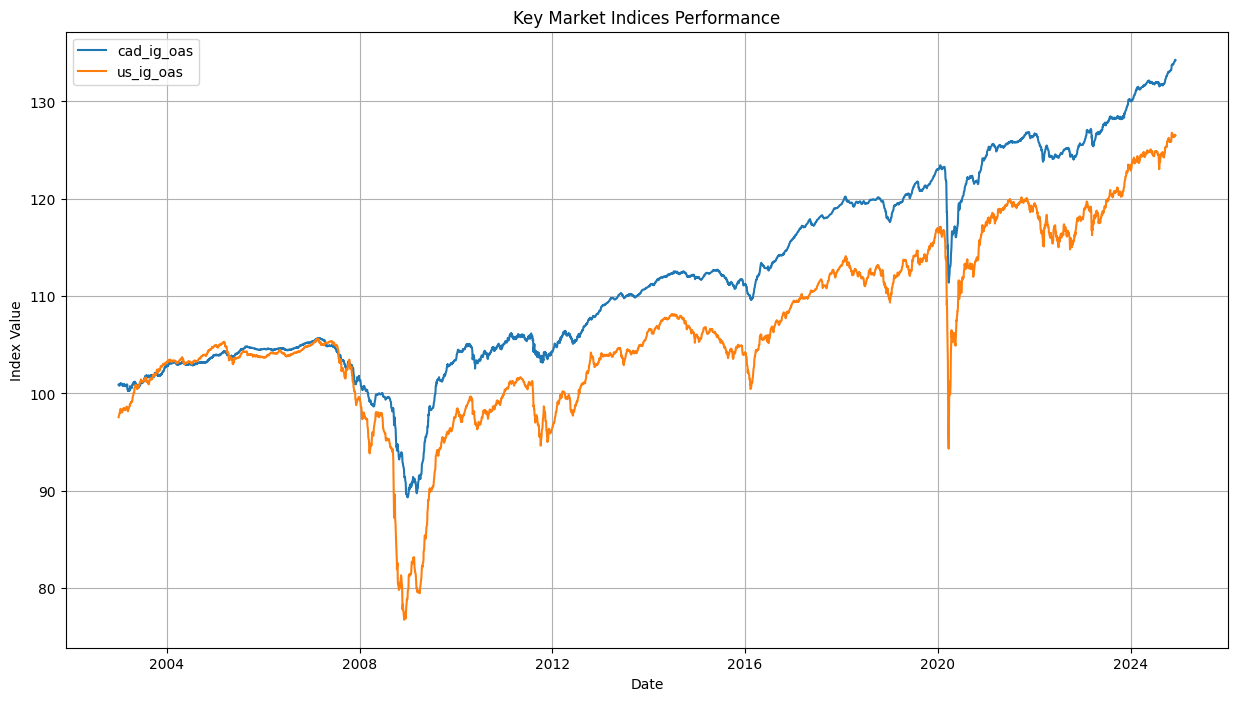

In [4]:
# Plot a few key indices for visualization
key_indices = ['cad_ig_oas_index', 'us_ig_oas_index']

plt.figure(figsize=(15, 8))
for idx in key_indices:
    plt.plot(indices_df.index, indices_df[idx], label=idx.replace('_index', ''))

plt.title('Key Market Indices Performance')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

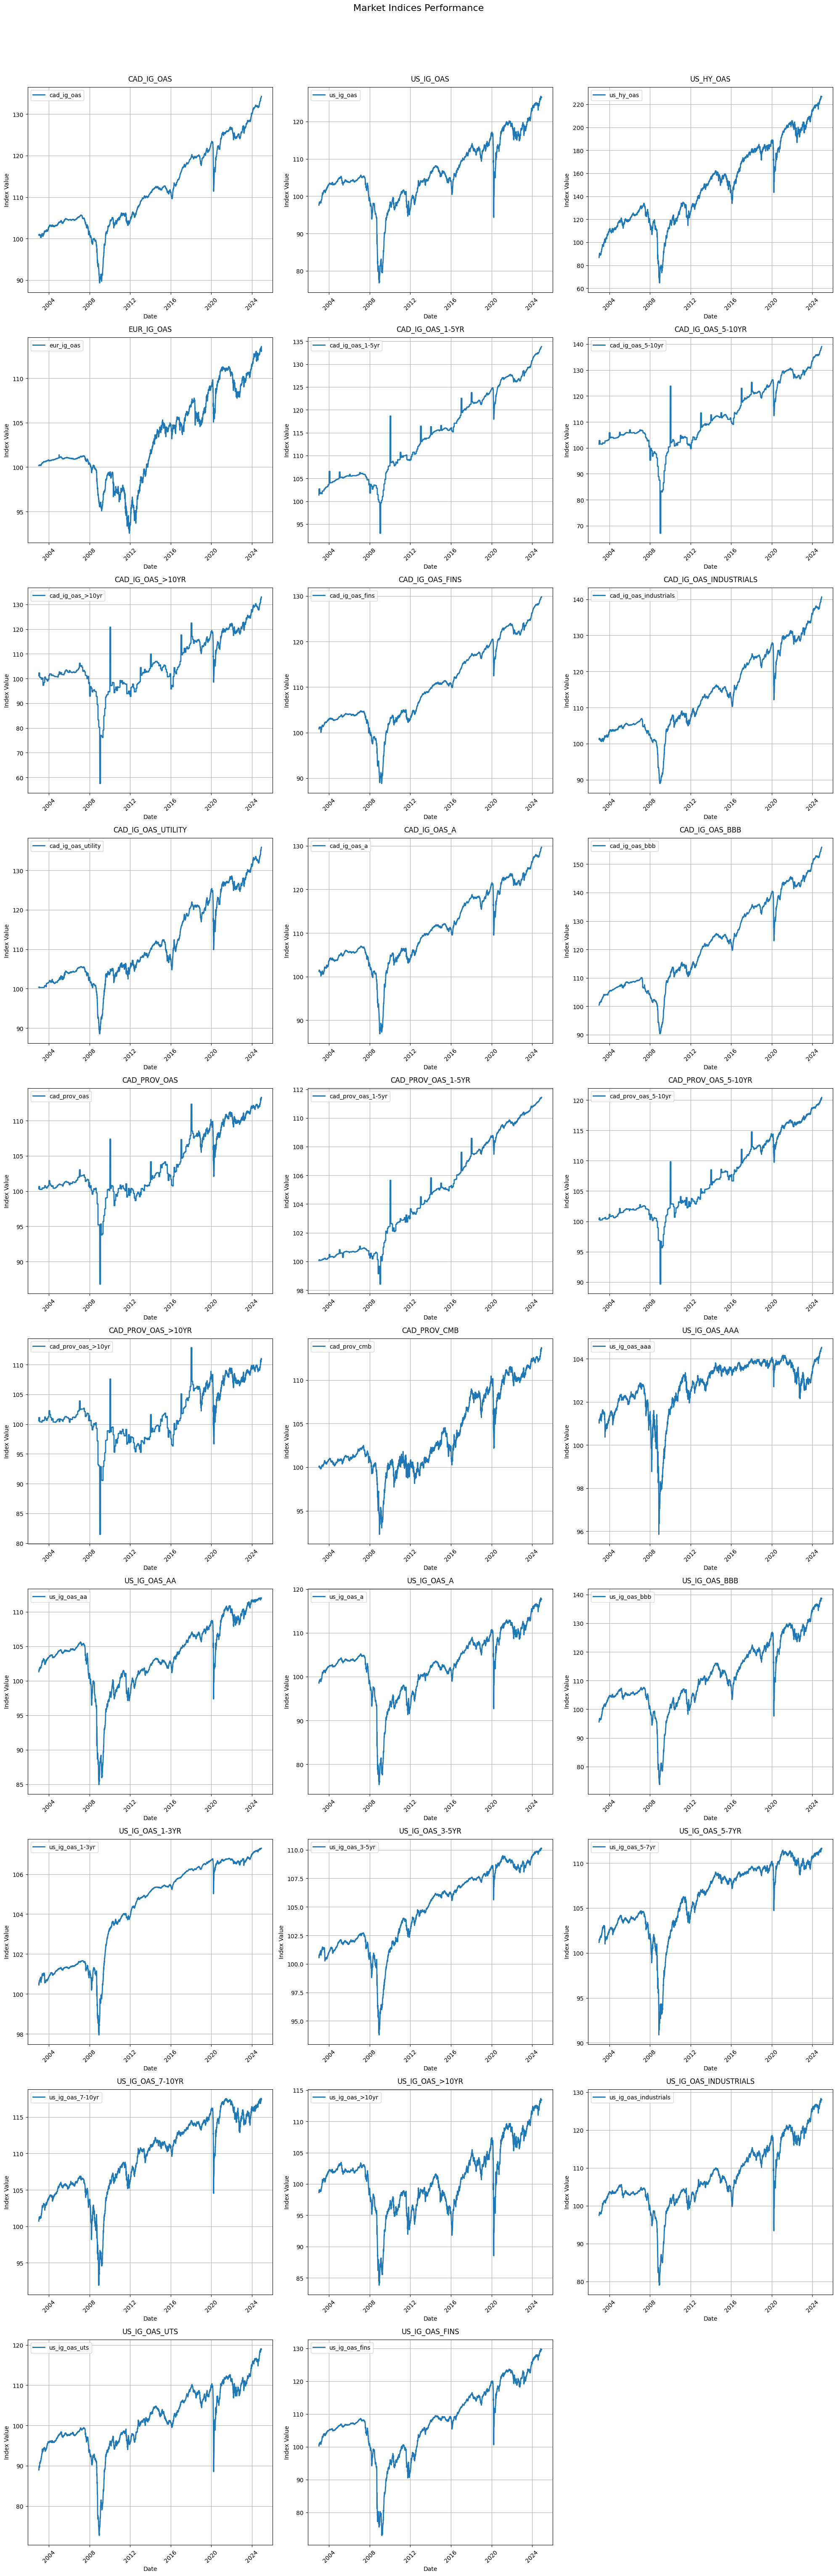

In [5]:
# Calculate number of rows needed for 3x3 grid
n_series = len(indices_df.columns)
n_rows = (n_series + 2) // 3  # Ceiling division to ensure enough rows

# Create 3x3 subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6*n_rows))
fig.suptitle('Market Indices Performance', fontsize=16, y=1.02)

# Flatten axes array for easier iteration
axes_flat = axes.flatten()

# Plot each series
for idx, series_name in enumerate(indices_df.columns):
    if idx < len(axes_flat):  # Ensure we don't exceed available subplots
        ax = axes_flat[idx]
        
        # Plot the series
        ax.plot(indices_df.index, indices_df[series_name], 
                label=series_name.replace('_index', ''),
                linewidth=2)
        
        # Customize each subplot
        ax.set_title(series_name.replace('_index', '').upper(), pad=10)
        ax.set_xlabel('Date')
        ax.set_ylabel('Index Value')
        ax.grid(True)
        ax.legend()
        
        # Format x-axis dates
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for idx in range(n_series, len(axes_flat)):
    fig.delaxes(axes_flat[idx])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [6]:
# Calculate some basic statistics for the indices
stats_df = pd.DataFrame()
stats_df['Start Value'] = indices_df.iloc[0]
stats_df['End Value'] = indices_df.iloc[-1]
stats_df['Total Return'] = (stats_df['End Value'] / stats_df['Start Value'] - 1) * 100
stats_df['Max Value'] = indices_df.max()
stats_df['Min Value'] = indices_df.min()
stats_df['Volatility'] = indices_df.pct_change().std() * np.sqrt(252) * 100  # Annualized volatility

print("Index Statistics:")
print(stats_df.round(2))

Index Statistics:
                              Start Value  End Value  Total Return  Max Value  \
cad_ig_oas_index                   100.89     134.26         33.08     134.29   
us_ig_oas_index                     97.55     126.51         29.69     126.77   
us_hy_oas_index                     86.71     226.71        161.47     226.98   
eur_ig_oas_index                   100.16     113.56         13.38     113.56   
cad_ig_oas_1-5yr_index             101.34     133.85         32.08     133.85   
cad_ig_oas_5-10yr_index            101.40     139.04         37.11     139.04   
cad_ig_oas_>10yr_index             101.13     132.89         31.40     133.04   
cad_ig_oas_fins_index              100.81     129.80         28.77     129.81   
cad_ig_oas_industrials_index       101.32     140.65         38.81     140.68   
cad_ig_oas_utility_index           100.35     135.82         35.35     135.92   
cad_ig_oas_a_index                 101.21     129.69         28.14     129.72   
cad_ig_oas